In [289]:
import pvmismatch
from pvlib import pvsystem, location
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

Using a 24 cell module.

In [290]:
pvm = pvmismatch.pvmodule.PVmodule(cell_pos=pvmismatch.pvmodule.STD24)

With perfect sun, single panel performance is as follows:

Power= 80.29832164906165


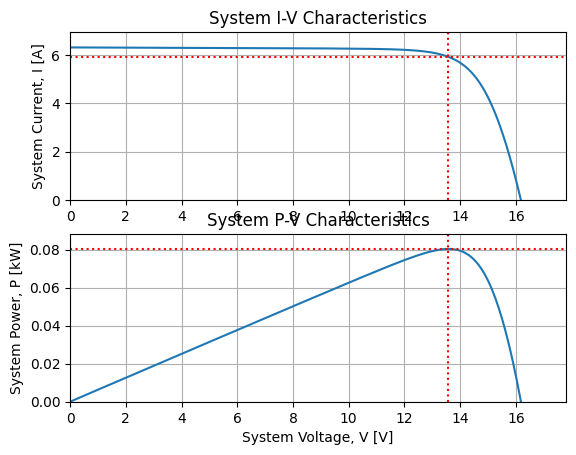

In [291]:
pvsys = pvmismatch.pvsystem.PVsystem(numberStrs=1, pvmods=[pvm])
f = pvsys.plotSys()
print("Power=", pvsys.Pmp)

System has 8 cells flat mounted on the roof in a 2S4P arrangement.

With perfect sun, system performance is as follows:

Peak Power= 642.3865731924932


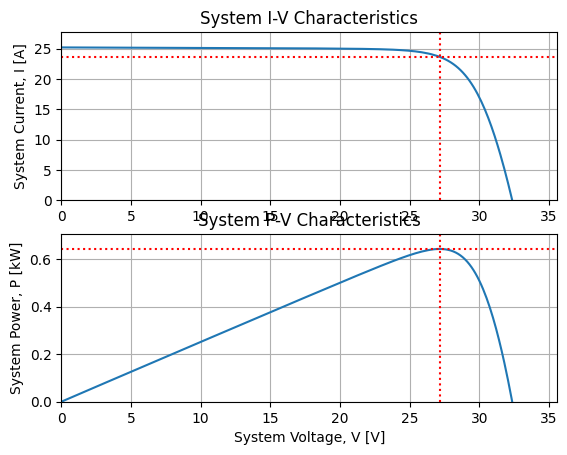

In [292]:
pvsys = pvmismatch.pvsystem.PVsystem(numberStrs=4, pvmods=[pvm,pvm])
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
perfect_sun_Pmp = pvsys.Pmp

Determine the solar characteristics for Key West in January.

In [293]:
roofPV = pvsystem.PVSystem()
groundPV = pvsystem.PVSystem(surface_tilt=45)
sigsbee = location.Location(24.5833, -81.767, 'US/Eastern', 0, 'Sigsbee Park')
times = pd.date_range(start='2024-01-20', end='2024-01-21', freq='1min', tz=sigsbee.tz)
cs = sigsbee.get_clearsky(times)
solpos = sigsbee.get_solarposition(times)
roof_irradiance = roofPV.get_irradiance(solpos['zenith'], solpos['azimuth'], cs['ghi'], cs['dni'], cs['dhi'])
ground_irradiance = groundPV.get_irradiance(solpos['zenith'], solpos['azimuth'], cs['ghi'], cs['dni'], cs['dhi'])
roof_suns = roof_irradiance['poa_global'].max() / 1000
roof_suns_shaded = roof_irradiance['poa_diffuse'].max() / 1000
ground_suns = ground_irradiance['poa_global'].max() / 1000
ground_suns_shaded = ground_irradiance['poa_diffuse'].max() / 1000
print('zenith=', solpos['zenith'].min())
print('roofsuns=', roof_suns)
print('roofsunsshaded=', roof_suns_shaded)
print('groundsuns=', ground_suns)
print('groundsunsshaded=', ground_suns_shaded)

zenith= 44.70300353083671
roofsuns= 0.6275475468963062
roofsunsshaded= 0.11674185623531673
groundsuns= 0.8821873172127347
groundsunsshaded= 0.16352425271712154


Peak Power= 397.2104079045333
Derate= 0.6183354766126283


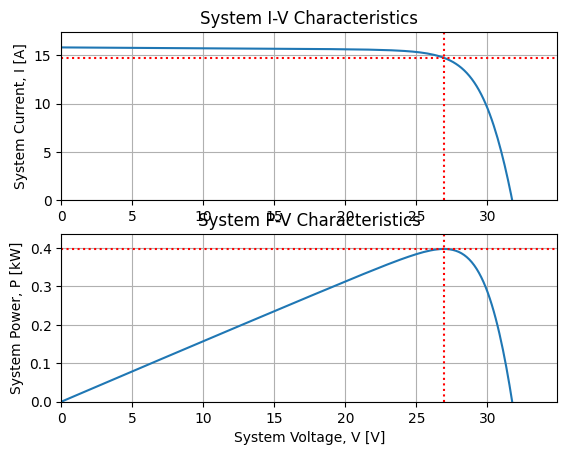

In [294]:

pvsys = pvmismatch.pvsystem.PVsystem(numberStrs=4, pvmods=[pvm,pvm])
pvsys.setSuns(roof_suns)
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
print("Derate=", pvsys.Pmp / perfect_sun_Pmp)


## Adding two ground panels
Case 0: Perfect Sun

Peak Power= 802.9832164906164


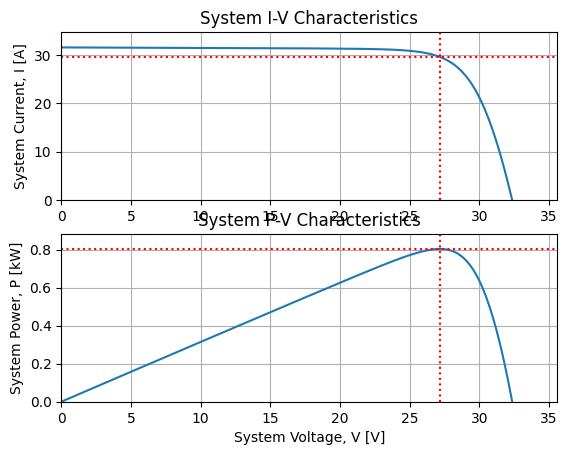

In [295]:
pvsys = pvmismatch.pvsystem.PVsystem(numberStrs=5, pvmods=[pvm,pvm])
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
perfect_sun_Pmp = pvsys.Pmp

Case 1: Ground Panels are Flat

Peak Power= 496.51300988066663
Derate= 0.6183354766126283


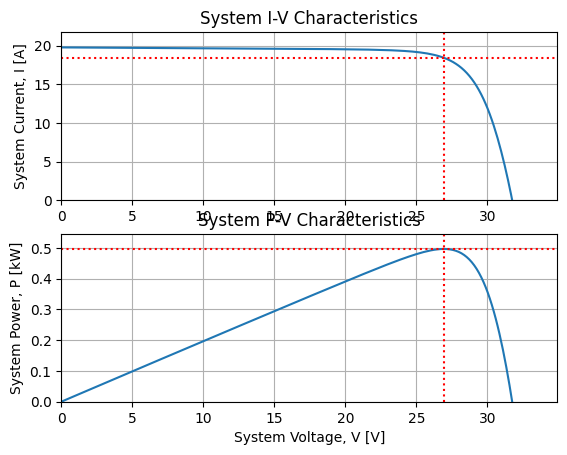

In [296]:
pvsys.setSuns(roof_suns)
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
print("Derate=", pvsys.Pmp / perfect_sun_Pmp)


Case 2: Ground Panels are Angled at 45 Degrees

Peak Power= 538.4411542503462
Derate= 0.670550944518575


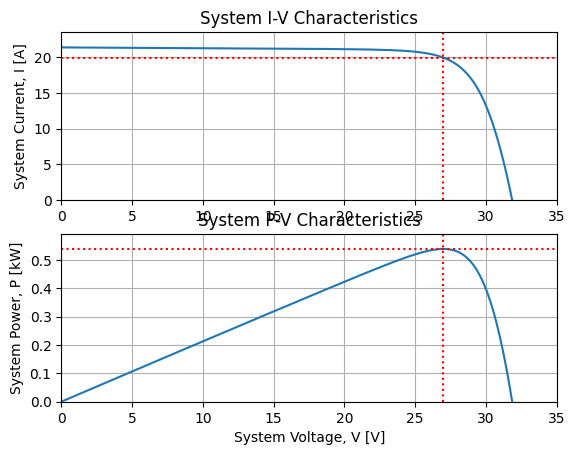

In [297]:
pvsys.setSuns(roof_suns)
pvsys.setSuns({4: ground_suns})
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
print("Derate=", pvsys.Pmp / perfect_sun_Pmp)


Case 3: All panels are angled at 45 degrees

Peak Power= 706.3336529507845
Derate= 0.8796368821228515


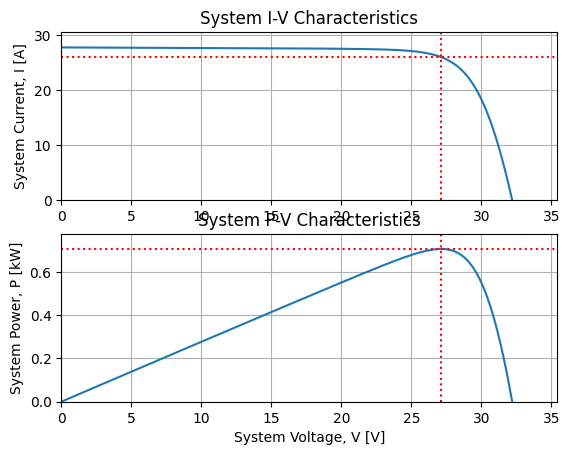

In [298]:
pvsys.setSuns(ground_suns)
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
print("Derate=", pvsys.Pmp / perfect_sun_Pmp)


## Looking at Shading of Roof Panels (2S2P)
### Case: Perfect Sun

Peak Power= 642.3865731924932


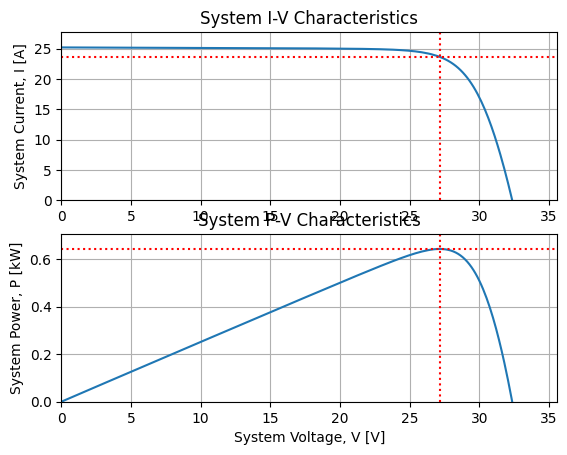

In [299]:
pvsys = pvmismatch.pvsystem.PVsystem(numberStrs=4, pvmods=[pvm,pvm])
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
perfect_sun_Pmp = pvsys.Pmp

### Case: No Shading - Key West Jan 20, 2024

Peak Power= 397.2104079045333
Derate= 0.6183354766126283


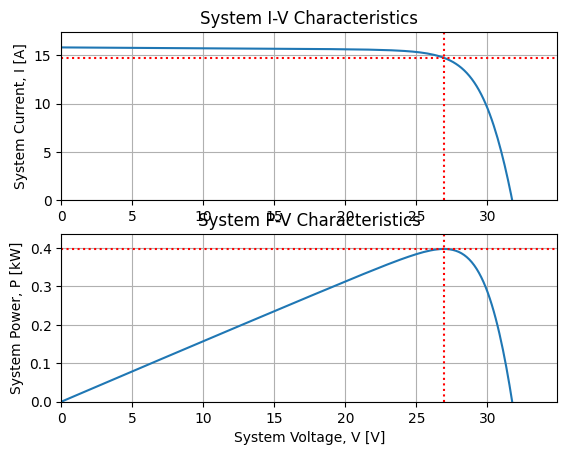

In [300]:
pvsys.setSuns(roof_suns)
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
print("Derate=", pvsys.Pmp / perfect_sun_Pmp)

### Case: 1 Panel Shaded (in one string)

Peak Power= 316.02810382221037
Derate= 0.49195938553266044


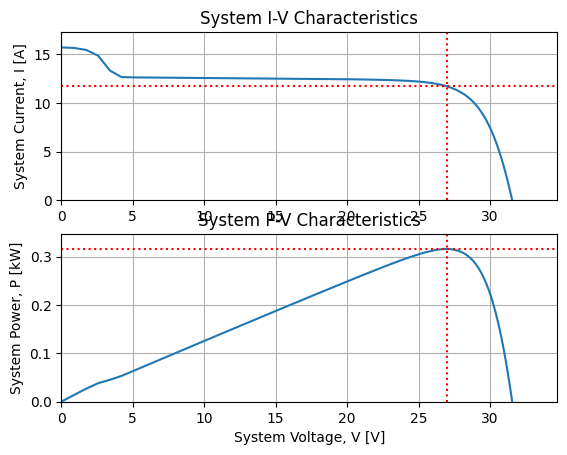

In [301]:
pvsys.setSuns(roof_suns)
pvsys.setSuns({0: {0: roof_suns_shaded}})
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
print("Derate=", pvsys.Pmp / perfect_sun_Pmp)

### Case: 2 Panels Shaded In One String

Peak Power= 312.5775083270325
Derate= 0.48658786059864867


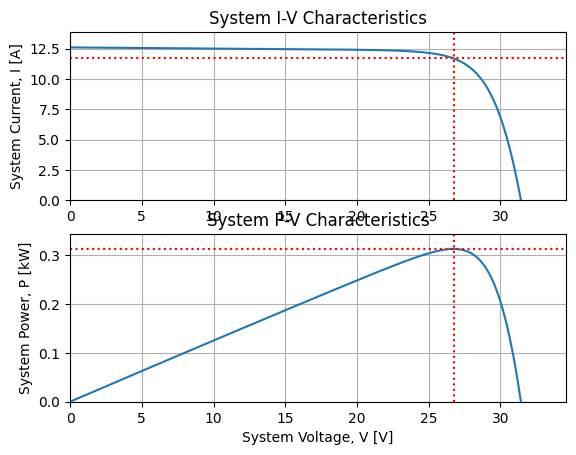

In [302]:
pvsys.setSuns(roof_suns)
pvsys.setSuns({0: {0: roof_suns_shaded, 1: roof_suns_shaded}})
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
print("Derate=", pvsys.Pmp / perfect_sun_Pmp)

### Case: 2 Panels Shaded In Two Strings

Peak Power= 234.84110392867066
Derate= 0.36557598450660606


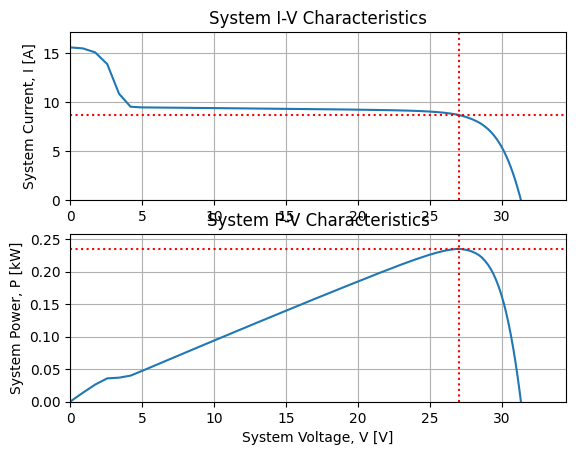

In [303]:
pvsys.setSuns(roof_suns)
pvsys.setSuns({0: {0: roof_suns_shaded}, 1: {0: roof_suns_shaded}})
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
print("Derate=", pvsys.Pmp / perfect_sun_Pmp)

### Case 2 - 4 Panels Total Shaded Across 2 Strings

Peak Power= 228.47615416936992
Derate= 0.35566769870967757


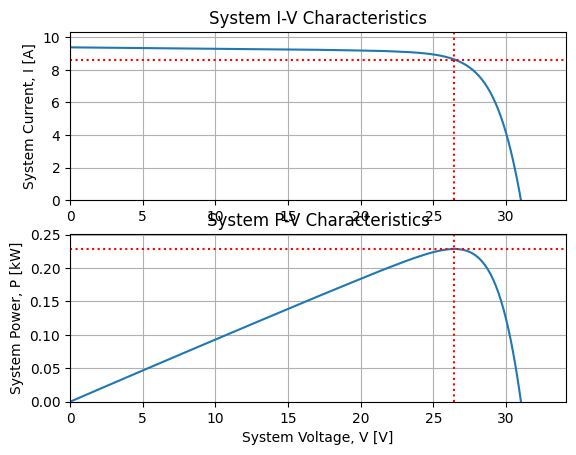

In [304]:
pvsys.setSuns({0: roof_suns_shaded, 1: roof_suns_shaded})
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
print("Derate=", pvsys.Pmp / perfect_sun_Pmp)

### Case 3 - 4 Panels Total Shaded Across 4 Strings

Peak Power= 72.51098521716655
Derate= 0.11287749190772454


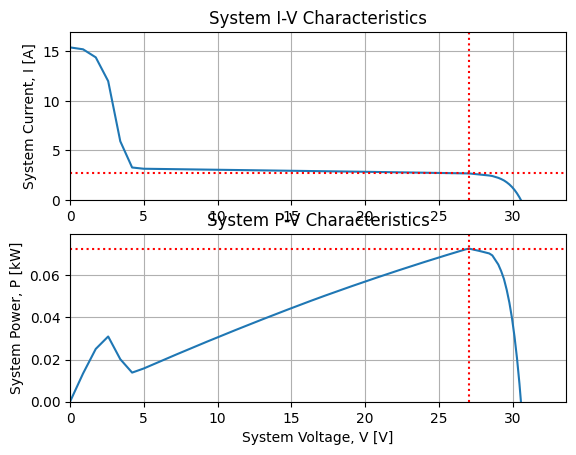

In [305]:
pvsys.setSuns(roof_suns)
pvsys.setSuns({0: {1: roof_suns_shaded}, 1: {1: roof_suns_shaded}, 2: {1: roof_suns_shaded}, 3: {1: roof_suns_shaded}})
f = pvsys.plotSys()
print("Peak Power=", pvsys.Pmp)
print("Derate=", pvsys.Pmp / perfect_sun_Pmp)
